In [1]:
# Import required libraries
import numpy as np
import pandas as pd
# for Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
# for model building 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Let's read the file into notebook
df = pd.read_csv(r'C:\Users\Surendra\Downloads\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Inspection

In [3]:
# Let's check shape of data 
df.shape

(1460, 81)

In [4]:
# Checking the describtion of file 
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Data Cleaning 

In [6]:
# Checking for mising vlues 
missing = df.isnull().sum()*100/len(df)
missing

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [7]:
# Dropping the columns which are not having NA values for clear understanding of NA values in data fram
missing = missing.drop(missing[missing == 0].index).sort_values(ascending=False)[:30]
# Making data fram of missing data
missing_data = pd.DataFrame({'Missing Ratio' :missing})
missing_data.head(30)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


From Data defining we can understand that here NA is having some meaning in columns, so we can't just remove the columns based on NA values %.
Let's impute information inplace of NA 

In [8]:
#NA in PoolQC column means No Pool, so we will replace NA by it.
df['PoolQC'] = df['PoolQC'].replace(np.nan,'No Pool')

In [9]:
# MiscFeature column has almost 96% null values so we will drop it
df= df.drop('MiscFeature', axis=1)

In [10]:
#NA in Alley column means No Alley, so we will replace NA by it.
df['Alley'].fillna('No Alley', inplace=True)

In [11]:
# NA in fence column means no Fence, Let's replace it with 
df['Fence'] = df['Fence'].replace(np.nan,'No Fence')

In [12]:
# Here NA means 'No Fireplace' so Let's replace na with 'No Fireplace'
df['FireplaceQu'] = df['FireplaceQu'].replace(np.nan, 'No Fireplace')

In [13]:
# Impute NA as 0 for LotFrontAge column
df['LotFrontage'].fillna(0, inplace=True) 

In [14]:
# Impute Na as 0 for MasVnrArea
df['MasVnrArea'].fillna(0, inplace=True) 

In [15]:
df['MasVnrType'].fillna('None', inplace=True) 

In [16]:
#NA in GarageType, GarageFinish, GarageQual, GarageCond columns mean No Garage, so we will replace NA by it.

df['GarageType'].fillna('No Garage', inplace=True) 
df['GarageFinish'].fillna('No Garage', inplace=True) 
df['GarageQual'].fillna('No Garage', inplace=True) 
df['GarageCond'].fillna('No Garage', inplace=True) 

In [17]:
# Fill NA with 'No Basement'.
for col in ('BsmtFinType2', 'BsmtFinType1','BsmtExposure', 'BsmtCond', 'BsmtQual'):
    df[col] = df[col].fillna('No Basement')

In [18]:
# Only one value is missing here, Let's replace it with mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [19]:
# For Garage year Built column, it is little tricky, Mostly the garage is building with house,     
# so we are considering Year built as Garageyrblt.    
# Let's replace it 
df.loc[:,'GarageYrBlt'] = df['GarageYrBlt'].fillna(df.YearBuilt)


In [20]:
# Checking for mising vlues 
missing = df.isnull().sum()*100/len(df)
missing

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 80, dtype: float64

In [21]:
# Dropping the columns which are not having NA values for clear understanding of NA values in data fram
missing = missing.drop(missing[missing == 0].index).sort_values(ascending=False)[:30]
# Making data fram of missing data
missing_data = pd.DataFrame({'Missing Ratio' :missing})
missing_data.head(30)

,Missing Ratio


Data Cleaning is completed as No NA values are here in our Dataset.


### EDA

In [22]:
#converting year to number of years
df['YearBuilt'] = 2019 - df['YearBuilt']
df['YearRemodAdd'] = 2019 - df['YearRemodAdd']
df['GarageYrBlt'] = 2019 - df['GarageYrBlt']
df['YrSold'] = 2019 - df['YrSold']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [24]:
# all numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,16,16,196.0,706,...,0,61,0,0,0,0,0,2,11,208500
1,2,20,80.0,9600,6,8,43,43,0.0,978,...,298,0,0,0,0,0,0,5,12,181500
2,3,60,68.0,11250,7,5,18,17,162.0,486,...,0,42,0,0,0,0,0,9,11,223500
3,4,70,60.0,9550,7,5,104,49,0.0,216,...,0,35,272,0,0,0,0,2,13,140000
4,5,60,84.0,14260,8,5,19,19,350.0,655,...,192,84,0,0,0,0,0,12,11,250000


In [25]:
#converting from int type to object to treat the variables as categorical variables
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
df['BsmtFullBath'] = df['BsmtFullBath'].astype('object')
df['BsmtHalfBath'] = df['BsmtHalfBath'].astype('object')
df['FullBath'] = df['FullBath'].astype('object')
df['HalfBath'] = df['HalfBath'].astype('object')
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype('object')
df['KitchenAbvGr'] = df['KitchenAbvGr'].astype('object')
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].astype('object')
df['Fireplaces'] = df['Fireplaces'].astype('object')
df['GarageCars'] = df['GarageCars'].astype('object')

In [26]:
# dropping the columns we want to treat as categorical variables
df_numeric = df_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)
df_numeric.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000


In [27]:
# Checking outliers by defining range 
df_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,57.623288,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,34.664304,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,42.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,63.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,1314.100000,92.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,...,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,1387.050000,104.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,...,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
99%,1445.410000,137.410000,37567.640000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,...,3123.480000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000


We can Observe here that a lot of columns are having outliers, Let's treat outliers 

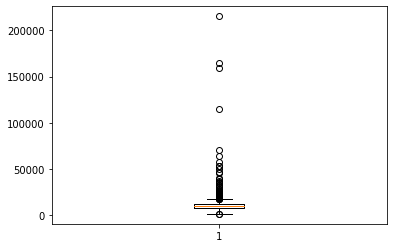

In [28]:
# Outlier treatment 'LotArea'
plt.boxplot(df['LotArea'])
percentiles = df['LotArea'].quantile([0.05,0.95]).values
df['LotArea'][df['LotArea'] <= percentiles[0]] = percentiles[0]
df['LotArea'][df['LotArea'] >= percentiles[1]] = percentiles[1]

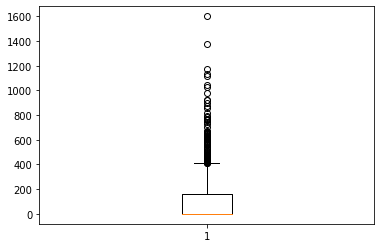

In [29]:
# Outlier treatment 'MasVnrArea'
plt.boxplot(df['MasVnrArea'])
percentiles = df['MasVnrArea'].quantile([0.05,0.95]).values
df['MasVnrArea'][df['MasVnrArea'] <= percentiles[0]] = percentiles[0]
df['MasVnrArea'][df['MasVnrArea'] >= percentiles[1]] = percentiles[1]

{'whiskers': [<matplotlib.lines.Line2D at 0xb3cbcf8>,
 'caps': [<matplotlib.lines.Line2D at 0xb3d6438>,
 'boxes': [<matplotlib.lines.Line2D at 0xb3cb908>],
 'medians': [<matplotlib.lines.Line2D at 0xb3d6ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0xb3d6e10>],
 'means': []}

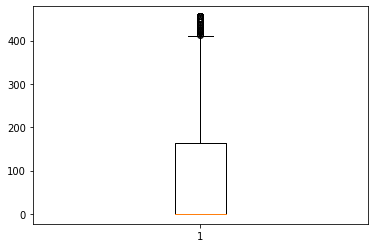

In [30]:
plt.boxplot(df['MasVnrArea'])

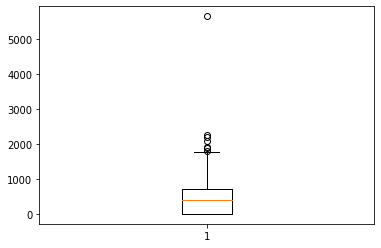

In [31]:
# Outlier treatment 'BsmtFinSF1'
plt.boxplot(df['BsmtFinSF1'])
percentiles = df['BsmtFinSF1'].quantile([0.05,0.95]).values
df['BsmtFinSF1'][df['BsmtFinSF1'] <= percentiles[0]] = percentiles[0]
df['BsmtFinSF1'][df['BsmtFinSF1'] >= percentiles[1]] = percentiles[1]

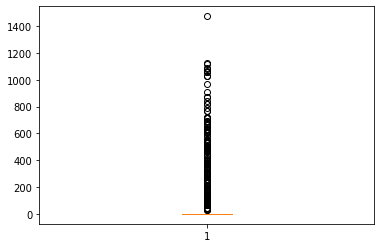

In [32]:
# Outlier treatment 'BsmtFinSF2'
plt.boxplot(df['BsmtFinSF2'])
percentiles = df['BsmtFinSF2'].quantile([0.05,0.95]).values
df['BsmtFinSF2'][df['BsmtFinSF2'] <= percentiles[0]] = percentiles[0]
df['BsmtFinSF2'][df['BsmtFinSF2'] >= percentiles[1]] = percentiles[1]

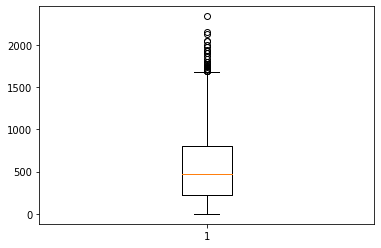

In [33]:
# Outlier treatment 'BsmtUnfSF'
plt.boxplot(df['BsmtUnfSF'])
percentiles = df['BsmtUnfSF'].quantile([0.05,0.95]).values
df['BsmtUnfSF'][df['BsmtUnfSF'] <= percentiles[0]] = percentiles[0]
df['BsmtUnfSF'][df['BsmtUnfSF'] >= percentiles[1]] = percentiles[1]

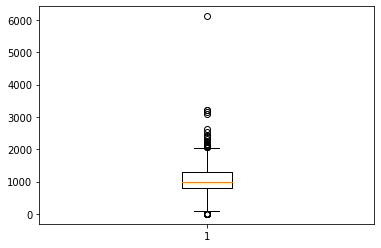

In [34]:

# Outlier treatment 'TotalBsmtSF'
plt.boxplot(df['TotalBsmtSF'])
percentiles = df['TotalBsmtSF'].quantile([0.05,0.95]).values
df['TotalBsmtSF'][df['TotalBsmtSF'] <= percentiles[0]] = percentiles[0]
df['TotalBsmtSF'][df['TotalBsmtSF'] >= percentiles[1]] = percentiles[1]

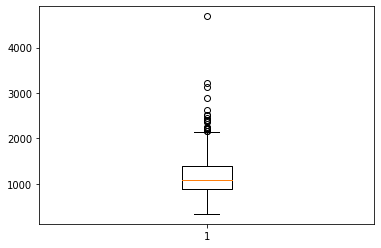

In [35]:

# Outlier treatment '1stFlrSF'
plt.boxplot(df['1stFlrSF'])
percentiles = df['1stFlrSF'].quantile([0.05,0.95]).values
df['1stFlrSF'][df['1stFlrSF'] <= percentiles[0]] = percentiles[0]
df['1stFlrSF'][df['1stFlrSF'] >= percentiles[1]] = percentiles[1]

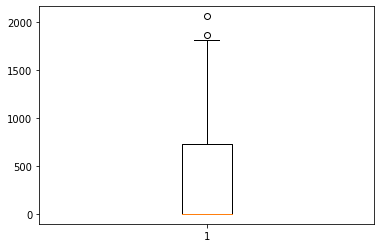

In [36]:
# Outlier treatment '2ndFlrSF'
plt.boxplot(df['2ndFlrSF'])
percentiles = df['2ndFlrSF'].quantile([0.05,0.95]).values
df['2ndFlrSF'][df['2ndFlrSF'] <= percentiles[0]] = percentiles[0]
df['2ndFlrSF'][df['2ndFlrSF'] >= percentiles[1]] = percentiles[1]

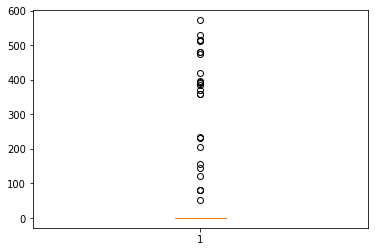

In [37]:
# Outlier treatment GrLivArea
plt.boxplot(df['LowQualFinSF'])
percentiles = df['LowQualFinSF'].quantile([0.05,0.95]).values
df['LowQualFinSF'][df['LowQualFinSF'] <= percentiles[0]] = percentiles[0]
df['LowQualFinSF'][df['LowQualFinSF'] >= percentiles[1]] = percentiles[1]

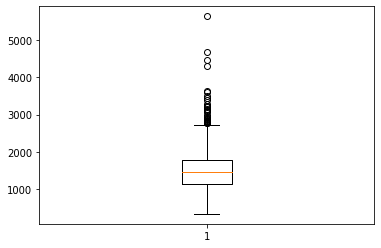

In [38]:
# Outlier treatment GrLivArea
plt.boxplot(df['GrLivArea'])
percentiles = df['GrLivArea'].quantile([0.05,0.95]).values
df['GrLivArea'][df['GrLivArea'] <= percentiles[0]] = percentiles[0]
df['GrLivArea'][df['GrLivArea'] >= percentiles[1]] = percentiles[1]

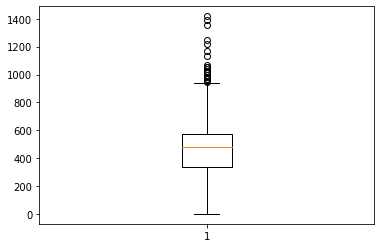

In [39]:
# Outlier treatment GarageArea
plt.boxplot(df['GarageArea'])
percentiles = df['GarageArea'].quantile([0.05,0.95]).values
df['GarageArea'][df['GarageArea'] <= percentiles[0]] = percentiles[0]
df['GarageArea'][df['GarageArea'] >= percentiles[1]] = percentiles[1]

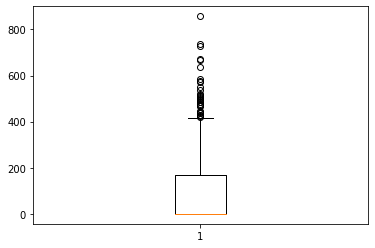

In [40]:
# Outlier treatment WoodDeckSF
plt.boxplot(df['WoodDeckSF'])
percentiles = df['WoodDeckSF'].quantile([0.05,0.95]).values
df['WoodDeckSF'][df['WoodDeckSF'] <= percentiles[0]] = percentiles[0]
df['WoodDeckSF'][df['WoodDeckSF'] >= percentiles[1]] = percentiles[1]

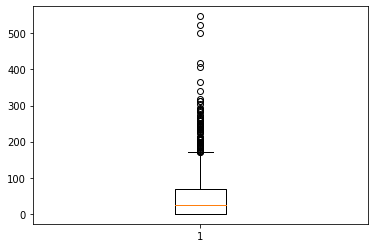

In [41]:
# Outlier treatment OpenPorchSF
plt.boxplot(df['OpenPorchSF'])
percentiles = df['OpenPorchSF'].quantile([0.05,0.95]).values
df['OpenPorchSF'][df['OpenPorchSF'] <= percentiles[0]] = percentiles[0]
df['OpenPorchSF'][df['OpenPorchSF'] >= percentiles[1]] = percentiles[1]

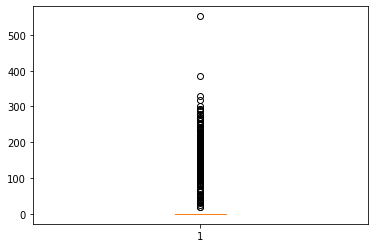

In [42]:
# Outlier treatment EnclosedPorch
plt.boxplot(df['EnclosedPorch'])
percentiles = df['EnclosedPorch'].quantile([0.05,0.95]).values
df['EnclosedPorch'][df['EnclosedPorch'] <= percentiles[0]] = percentiles[0]
df['EnclosedPorch'][df['EnclosedPorch'] >= percentiles[1]] = percentiles[1]

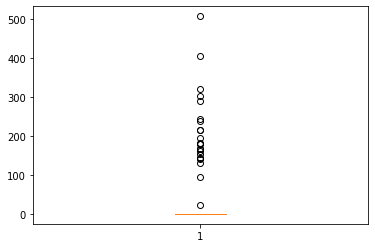

In [43]:
# Outlier treatment 3SsnPorch
plt.boxplot(df['3SsnPorch'])
percentiles = df['3SsnPorch'].quantile([0.05,0.95]).values
df['3SsnPorch'][df['3SsnPorch'] <= percentiles[0]] = percentiles[0]
df['3SsnPorch'][df['3SsnPorch'] >= percentiles[1]] = percentiles[1]

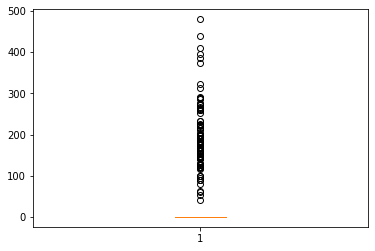

In [44]:

# Outlier treatment ScreenPorch
plt.boxplot(df['ScreenPorch'])
percentiles = df['ScreenPorch'].quantile([0.05,0.95]).values
df['ScreenPorch'][df['ScreenPorch'] <= percentiles[0]] = percentiles[0]
df['ScreenPorch'][df['ScreenPorch'] >= percentiles[1]] = percentiles[1]

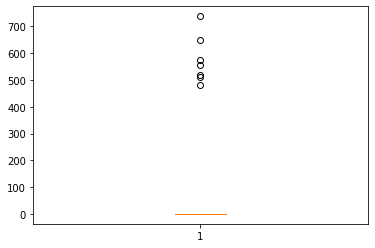

In [45]:
# Outlier treatment PoolArea
plt.boxplot(df['PoolArea'])
percentiles = df['PoolArea'].quantile([0.05,0.95]).values
df['PoolArea'][df['PoolArea'] <= percentiles[0]] = percentiles[0]
df['PoolArea'][df['PoolArea'] >= percentiles[1]] = percentiles[1]

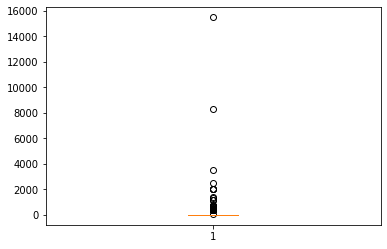

In [46]:
# Outlier treatment MiscVal
plt.boxplot(df['MiscVal'])
percentiles = df['MiscVal'].quantile([0.05,0.95]).values
df['MiscVal'][df['MiscVal'] <= percentiles[0]] = percentiles[0]
df['MiscVal'][df['MiscVal'] >= percentiles[1]] = percentiles[1]

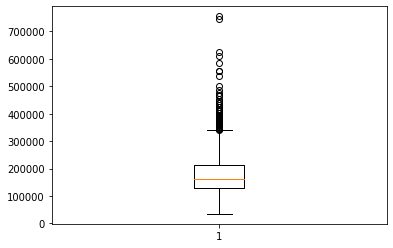

In [47]:
# Outlier treatment SalePrice
plt.boxplot(df['SalePrice'])
percentiles = df['SalePrice'].quantile([0.05,0.95]).values
df['SalePrice'][df['SalePrice'] <= percentiles[0]] = percentiles[0]
df['SalePrice'][df['SalePrice'] >= percentiles[1]] = percentiles[1]

### Checking the Correlation between the variables

In [48]:
#correlation matrix
cor = df_numeric.corr()
cor

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.000000,-0.019761,-0.033226,-0.051071,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,...,0.008273,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,-0.021917
LotFrontage,-0.019761,1.000000,0.100739,0.105010,0.076670,-0.009312,0.160829,0.238274,0.245181,0.042549,...,0.220347,0.201473,-0.016780,0.069605,0.027366,0.023499,0.022969,0.114106,-0.059606,0.209624
LotArea,-0.033226,0.100739,1.000000,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,...,0.263116,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,-0.051071,0.105010,0.103321,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,...,0.388052,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,0.472614
BsmtFinSF1,-0.005024,0.076670,0.214103,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,...,0.208171,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,-0.005968,-0.009312,0.111170,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,...,-0.009640,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,-0.007940,0.160829,-0.002618,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,...,0.240257,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,-0.015415,0.238274,0.260833,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,...,0.454868,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.010496,0.245181,0.299475,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,...,0.566024,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.005590,0.042549,0.050986,0.173800,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,...,0.687501,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334


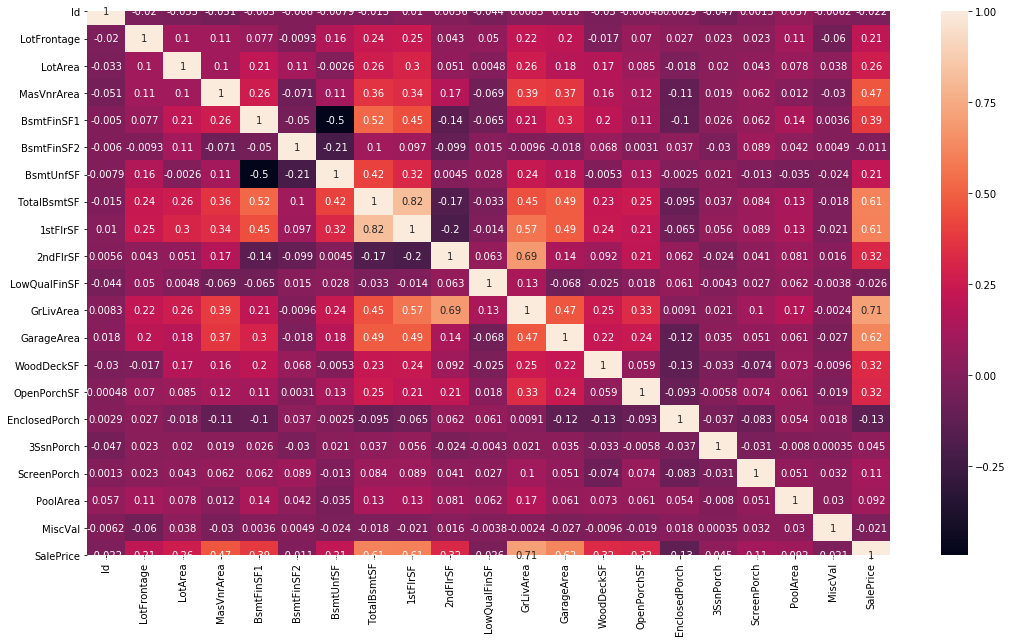

In [49]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(cor, annot=True)
plt.show()

In [50]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,No Alley,Reg,Lvl,AllPub,...,0,0,No Pool,No Fence,0,2,11,WD,Normal,208500.0
1,2,20,RL,80.0,9600.0,Pave,No Alley,Reg,Lvl,AllPub,...,0,0,No Pool,No Fence,0,5,12,WD,Normal,181500.0
2,3,60,RL,68.0,11250.0,Pave,No Alley,IR1,Lvl,AllPub,...,0,0,No Pool,No Fence,0,9,11,WD,Normal,223500.0
3,4,70,RL,60.0,9550.0,Pave,No Alley,IR1,Lvl,AllPub,...,0,0,No Pool,No Fence,0,2,13,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260.0,Pave,No Alley,IR1,Lvl,AllPub,...,0,0,No Pool,No Fence,0,12,11,WD,Normal,250000.0


### Dummy Variables

In [51]:
# List of variables to map

varlist1 =  ['Street']

# Defining the map function
def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})

# Applying the function to the Lead list
df[varlist1] = df[varlist1].apply(binary_map)

In [52]:
# List of variables to map

varlist3 =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the Lead list
df[varlist3] = df[varlist3].apply(binary_map)

In [53]:
# List of variables to map

varlist2 =  ['Utilities']

# Defining the map function
def binary_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

# Applying the function to the Lead list
df[varlist2] = df[varlist2].apply(binary_map)

### Data Preparation


Data Preparation
Let's now prepare the data and build the model

In [54]:
# split into X and y
X = df.drop([ 'Id'], axis=1)

In [55]:
# creating dummy variables for categorical variables

# subset all categorical variables
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,No Alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,RL,No Alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,RL,No Alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,RL,No Alley,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,3,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,RL,No Alley,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,3,TA,TA,Y,No Pool,No Fence,WD,Normal


In [56]:
# convert into dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [57]:
# drop original categorical variables 
X = df.drop(list(df_categorical.columns), axis=1)

In [58]:
# concat dummy variables with X
X = pd.concat([X, df_dummies], axis=1)

In [59]:
X.shape

(1460, 314)

In [60]:
# split into X and y
X = X.drop([ 'Id'], axis=1)

In [61]:
X.head()

,LotFrontage,LotArea,Street,Utilities,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,1,1,16,16,196.0,706,0.0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600.0,1,1,43,43,0.0,978,0.0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250.0,1,1,18,17,162.0,486,0.0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550.0,1,1,104,49,0.0,216,0.0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260.0,1,1,19,19,350.0,655,0.0,490,...,0,0,0,0,1,0,0,0,1,0


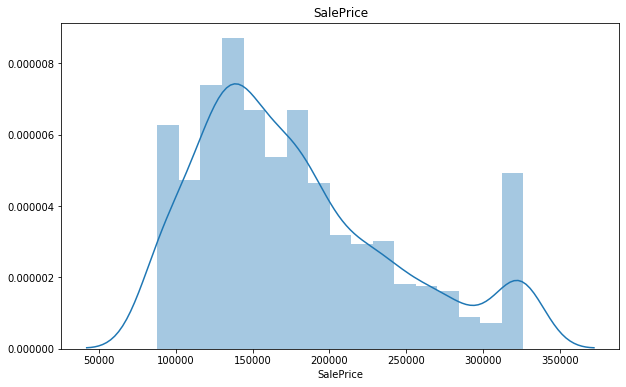

In [62]:
# Checking the target variable is normally distributed or not 
plt.figure(figsize=(10,6))

plt.title('SalePrice')
sns.distplot(X.SalePrice)

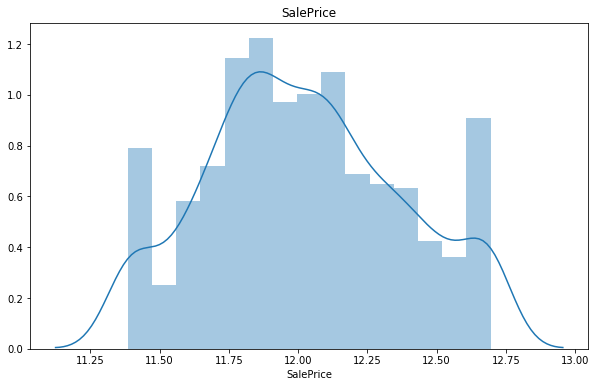

In [63]:
# Converting target variable into log and ploting it 
plt.figure(figsize=(10,6))

plt.title('SalePrice')
sns.distplot(X.SalePrice.apply(np.log))

In [64]:
y = np.log(X.SalePrice)
X = X.drop("SalePrice",1) # take out the target variable

In [65]:
# scaling the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [66]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Model Building and Evaluation

## Linear Regression

In [67]:
# linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
from sklearn import metrics
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9671252079545942

In [68]:
# Checking R-squared on test data
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.8363243607905052

It seems that it is a good model as the test score is also good

### Ridge Regression

In [69]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [70]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 6.0}
-0.07120701969602357


In [71]:
# cv_result of model under the range of alpha
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022601,0.004924,0.0042,1.469724e-03,0.0001,{'alpha': 0.0001},-0.080240,-0.083506,-0.084038,-0.082604,...,-0.080861,0.003707,26,-0.044799,-0.044785,-0.045085,-0.045584,-0.046814,-0.045413,0.000758
1,0.021001,0.003406,0.0036,4.900182e-04,0.001,{'alpha': 0.001},-0.080181,-0.083486,-0.084022,-0.082484,...,-0.080808,0.003711,25,-0.044805,-0.044788,-0.045089,-0.045592,-0.046824,-0.045420,0.000760
2,0.018201,0.003868,0.0030,6.326359e-04,0.01,{'alpha': 0.01},-0.079681,-0.083310,-0.083860,-0.081624,...,-0.080382,0.003767,24,-0.044870,-0.044819,-0.045136,-0.045674,-0.046922,-0.045484,0.000780
3,0.015001,0.000633,0.0024,4.900182e-04,0.05,{'alpha': 0.05},-0.078258,-0.082716,-0.083173,-0.079048,...,-0.079079,0.003949,23,-0.045216,-0.044979,-0.045333,-0.046101,-0.047297,-0.045785,0.000844
4,0.016401,0.002498,0.0030,6.325605e-04,0.1,{'alpha': 0.1},-0.077101,-0.082174,-0.082502,-0.076974,...,-0.077987,0.004147,21,-0.045623,-0.045167,-0.045563,-0.046604,-0.047685,-0.046128,0.000911
5,0.015601,0.001020,0.0028,3.999233e-04,0.2,{'alpha': 0.2},-0.075641,-0.081448,-0.081637,-0.074798,...,-0.076691,0.004415,20,-0.046315,-0.045558,-0.045975,-0.047377,-0.048363,-0.046718,0.001020
6,0.014801,0.000400,0.0022,3.999710e-04,0.3,{'alpha': 0.3},-0.074708,-0.080921,-0.080937,-0.073724,...,-0.075862,0.004562,19,-0.046862,-0.045881,-0.046324,-0.048041,-0.048948,-0.047211,0.001130
7,0.014401,0.000490,0.0028,3.998995e-04,0.4,{'alpha': 0.4},-0.073960,-0.080519,-0.080333,-0.072927,...,-0.075214,0.004658,17,-0.047311,-0.046170,-0.046649,-0.048571,-0.049432,-0.047627,0.001211
8,0.017601,0.000490,0.0032,4.001617e-04,0.5,{'alpha': 0.5},-0.073453,-0.080204,-0.079864,-0.072317,...,-0.074725,0.004733,16,-0.047719,-0.046421,-0.046940,-0.049009,-0.049860,-0.047990,0.001278
9,0.018201,0.003060,0.0028,3.999949e-04,0.6,{'alpha': 0.6},-0.073058,-0.079922,-0.079474,-0.071828,...,-0.074324,0.004786,15,-0.048085,-0.046651,-0.047217,-0.049401,-0.050241,-0.048319,0.001335


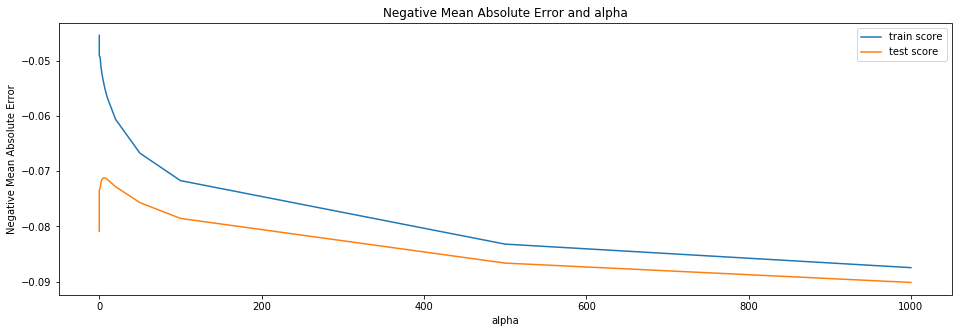

In [72]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

from the above graph and the bestparam score we got optimum lambda to be 6

In [73]:
# finding the ridge coefficients on best alpha
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-5.47846145e-05,  7.77008380e-06,  4.68677192e-03,  1.22880076e-02,
       -1.93326827e-03, -1.31521617e-03, -7.03750043e-06, -1.17552656e-05,
       -4.71817835e-05, -7.02526815e-05,  2.11213696e-04,  3.11776912e-02,
       -2.75690693e-05,  8.24206430e-05,  0.00000000e+00,  2.53098402e-04,
       -1.32891155e-04,  1.44727581e-04,  9.46150568e-05,  8.96911934e-05,
        4.14292422e-05,  0.00000000e+00,  1.13663213e-04,  0.00000000e+00,
        0.00000000e+00,  7.98495035e-04,  3.79263964e-05, -3.42277160e-02,
       -1.94643742e-02,  3.24034021e-03, -1.15642509e-02, -4.02170229e-02,
        2.64774783e-02,  2.36772239e-02, -2.17053822e-03,  1.50487779e-02,
       -6.49396182e-03,  1.43679062e-02, -6.39369064e-02, -2.04975389e-02,
       -9.17539276e-03,  4.25309832e-02,  3.13140231e-02,  2.48038181e-02,
       -8.43008967e-03, -2.55063662e-04,  2.21800144e-02, -6.19175293e-03,
       -1.12396987e-02,  4.60926910e-03,  1.12701550e-02,  9.85649319e-03,
        2.30380312e-02,  

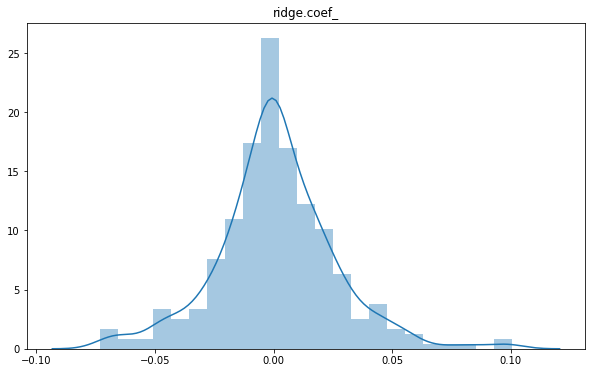

In [74]:
# Ploting the coefficients 
plt.figure(figsize=(10,6))

plt.title('ridge.coef_')
sns.distplot(ridge.coef_)

In [75]:
#lets predict the R-squared value of train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9551316883337474


The score is pretty good 

In [76]:
# ridge coef If we double the value of alpha
alpha = 12
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-7.14220714e-05,  7.58231256e-06,  2.30149798e-03,  6.27314954e-03,
       -1.82887450e-03, -1.42930640e-03, -8.49766646e-07, -1.24464645e-05,
       -5.52502460e-05, -7.57213941e-05,  2.24389933e-04,  2.94737538e-02,
       -3.09663665e-05,  7.20427459e-05,  0.00000000e+00,  2.57517779e-04,
       -1.60672908e-04,  1.49653081e-04,  9.40180462e-05,  8.77018169e-05,
        4.07899400e-05,  0.00000000e+00,  1.14069746e-04,  0.00000000e+00,
        0.00000000e+00,  8.13685047e-04,  4.24862877e-05, -3.01073033e-02,
       -9.44441613e-03,  5.88156966e-03, -8.37912199e-03, -3.16526586e-02,
        3.31925166e-02,  1.63567116e-02,  2.32096013e-03,  1.03235071e-02,
       -7.65607130e-03,  1.33290733e-02, -4.95788003e-02, -1.76745202e-02,
       -7.09485018e-03,  3.48780831e-02,  2.03242841e-02,  1.84240046e-02,
       -1.74114149e-02, -9.34111773e-04,  1.93232824e-02, -3.59747029e-03,
       -1.31760716e-02,  3.35987393e-03,  1.11747174e-02,  1.02174176e-02,
        1.71058313e-02,  

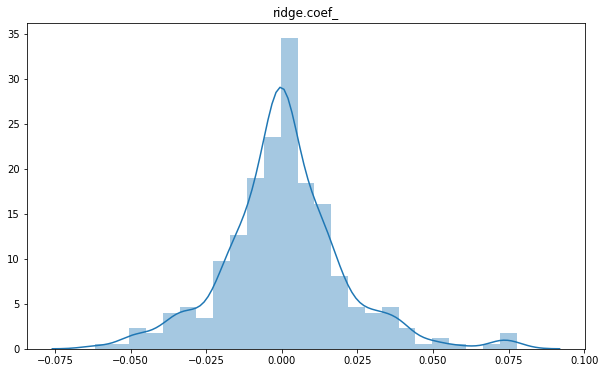

In [77]:
# Ploting the coef now 
plt.figure(figsize=(10,6))

plt.title('ridge.coef_')
sns.distplot(ridge.coef_)

So coefficient values got reduced when we double the value of alpha

In [78]:
#lets predict the R-squared value of train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.950206718025026


Predition score is also good

In [79]:
# Now let's check the test score on best value of alpha
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)
ridge.coef_

array([ 1.60476363e-05,  6.52134117e-06,  4.05455398e-02,  0.00000000e+00,
       -1.36318204e-03, -5.74202602e-04, -7.80744522e-05,  5.24693289e-05,
        1.48015664e-04, -1.23427155e-05,  7.51339944e-05,  3.82630373e-02,
        1.62342781e-04,  1.67515808e-04,  0.00000000e+00,  7.71616880e-05,
        6.51445380e-04,  1.09291453e-04,  1.72891349e-04,  2.32602091e-04,
        2.39228848e-04,  0.00000000e+00,  6.40221953e-04,  0.00000000e+00,
        0.00000000e+00,  1.48276812e-03,  4.75886951e-03, -2.40829206e-02,
       -7.07392343e-03, -8.42344822e-04, -1.56273008e-02, -3.52142003e-03,
        1.80244161e-02,  2.31606833e-03,  6.27309976e-03, -5.95280430e-03,
       -4.29748089e-03,  9.91844516e-03, -5.03193547e-02,  8.01998161e-03,
        5.46227888e-03,  4.55222914e-02, -2.10156131e-02,  3.33972743e-02,
       -1.03396476e-02, -2.15757744e-02, -1.40876401e-02,  1.85817929e-02,
       -1.04483483e-03,  4.91280480e-03,  2.33057513e-02, -2.29299917e-02,
       -8.32847201e-03,  

In [80]:
# lets predict the R-squared value of test data
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9449892852157339


The score is slightly reduced but still it is a good score

## Lasso

In [81]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [82]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.389222,1.092169e-01,0.0030,6.326359e-04,0.0001,{'alpha': 0.0001},-0.071070,-0.079091,-0.073979,-0.067930,...,-0.071051,0.005382,1,-0.049563,-0.048417,-0.049202,-0.050304,-0.051174,-0.049732,0.000943
1,0.109606,1.535796e-02,0.0034,8.000493e-04,0.001,{'alpha': 0.001},-0.068581,-0.078677,-0.073622,-0.072920,...,-0.072390,0.003843,2,-0.066324,-0.063837,-0.063866,-0.065546,-0.066008,-0.065116,0.001062
2,0.059403,6.343820e-03,0.0028,3.999949e-04,0.01,{'alpha': 0.01},-0.088793,-0.104192,-0.098092,-0.094007,...,-0.094922,0.005719,3,-0.094437,-0.091255,-0.092431,-0.092965,-0.094193,-0.093056,0.001170
3,0.050403,3.826354e-03,0.0028,7.483027e-04,0.05,{'alpha': 0.05},-0.090666,-0.106141,-0.100296,-0.096554,...,-0.096747,0.006039,5,-0.097100,-0.092619,-0.094772,-0.095569,-0.097375,-0.095487,0.001727
4,0.040402,1.070752e-02,0.0026,4.899403e-04,0.1,{'alpha': 0.1},-0.090537,-0.106098,-0.100252,-0.096617,...,-0.096694,0.006070,4,-0.097141,-0.092716,-0.094717,-0.095619,-0.097416,-0.095522,0.001717
5,0.038802,5.946718e-03,0.0026,7.999420e-04,0.2,{'alpha': 0.2},-0.090414,-0.106303,-0.100576,-0.097619,...,-0.097075,0.006096,6,-0.097573,-0.093131,-0.094906,-0.096101,-0.097800,-0.095902,0.001738
6,0.038002,8.485689e-03,0.0026,4.899014e-04,0.3,{'alpha': 0.3},-0.090822,-0.106771,-0.101228,-0.098604,...,-0.097739,0.006069,7,-0.098294,-0.093753,-0.095425,-0.096776,-0.098421,-0.096534,0.001771
7,0.033402,8.823229e-03,0.0024,4.899208e-04,0.4,{'alpha': 0.4},-0.091678,-0.107652,-0.102025,-0.099722,...,-0.098584,0.006140,8,-0.099255,-0.094575,-0.096329,-0.097717,-0.099292,-0.097433,0.001802
8,0.031402,6.917080e-03,0.0028,3.999710e-04,0.5,{'alpha': 0.5},-0.092656,-0.108768,-0.103133,-0.101065,...,-0.099647,0.006256,9,-0.100373,-0.095689,-0.097304,-0.098890,-0.100389,-0.098529,0.001820
9,0.024602,6.651526e-03,0.0026,4.899014e-04,0.6,{'alpha': 0.6},-0.093922,-0.109506,-0.104103,-0.102546,...,-0.100753,0.006126,10,-0.101608,-0.096840,-0.098290,-0.100056,-0.101478,-0.099654,0.001848


In [83]:
#lets find out the R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [84]:
# cv results
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.366621,0.126282,0.0028,3.999949e-04,0.0001,{'alpha': 0.0001},0.926276,0.885887,0.907768,0.931200,...,0.919226,0.020495,1,0.966423,0.967009,0.966904,0.965674,0.964361,0.966074,0.000978
1,0.105606,0.014747,0.0030,1.168008e-07,0.001,{'alpha': 0.001},0.933783,0.893194,0.904997,0.920524,...,0.918296,0.017203,2,0.933134,0.939857,0.939123,0.934698,0.932212,0.935805,0.003121
2,0.059803,0.007195,0.0028,4.000425e-04,0.01,{'alpha': 0.01},0.885302,0.817106,0.823005,0.863648,...,0.855528,0.030261,3,0.856803,0.869159,0.869983,0.862092,0.856541,0.862916,0.005790
3,0.047403,0.002498,0.0028,4.000425e-04,0.05,{'alpha': 0.05},0.878472,0.809068,0.815663,0.855550,...,0.848268,0.030799,4,0.847014,0.864259,0.862100,0.852422,0.845659,0.854291,0.007633
4,0.039002,0.009839,0.0024,4.899792e-04,0.1,{'alpha': 0.1},0.878103,0.808623,0.816228,0.854147,...,0.847912,0.030631,5,0.846562,0.863838,0.861718,0.851984,0.845238,0.853868,0.007648
5,0.037602,0.004758,0.0028,4.000187e-04,0.2,{'alpha': 0.2},0.875966,0.807312,0.816599,0.850170,...,0.846299,0.030108,6,0.844903,0.862481,0.860192,0.850383,0.843676,0.852327,0.007729
6,0.037202,0.007441,0.0032,3.999234e-04,0.3,{'alpha': 0.3},0.873304,0.806060,0.816090,0.847226,...,0.844506,0.029568,7,0.842729,0.860483,0.857670,0.848689,0.841391,0.850192,0.007710
7,0.033402,0.008188,0.0030,1.168008e-07,0.4,{'alpha': 0.4},0.870552,0.804587,0.814797,0.843637,...,0.842400,0.029270,8,0.840376,0.858159,0.854876,0.846386,0.839220,0.847804,0.007591
8,0.028202,0.006795,0.0030,1.784161e-07,0.5,{'alpha': 0.5},0.867175,0.802448,0.812352,0.839302,...,0.839544,0.029123,9,0.837398,0.855172,0.852151,0.843426,0.836448,0.844919,0.007589
9,0.023801,0.004833,0.0030,6.325605e-04,0.6,{'alpha': 0.6},0.863401,0.800536,0.810183,0.834706,...,0.836627,0.028783,10,0.834129,0.852333,0.849539,0.840336,0.833534,0.841974,0.007746


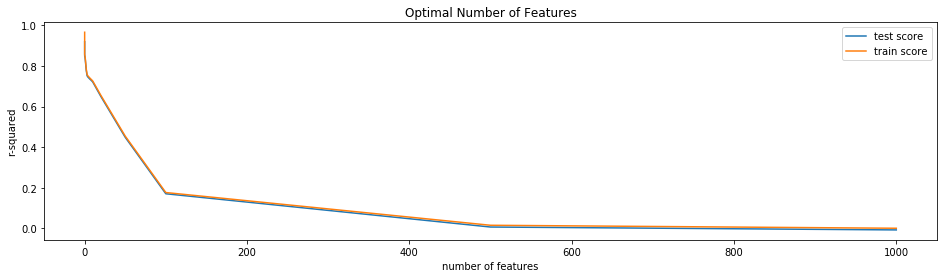

In [85]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [86]:
#checking the value of optimum number of parameters
print(model_cv1.best_params_)
print(model_cv1.best_score_)

{'alpha': 0.0001}
0.9192264773591929


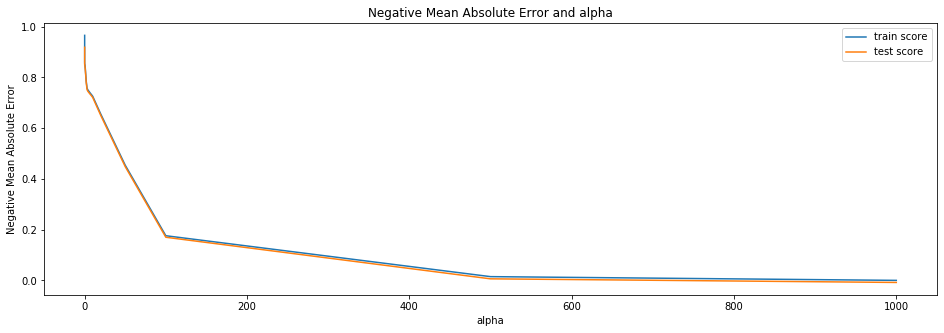

In [87]:
# plotting mean test and train scores with alpha 
cv_results1['param_alpha'] = cv_results1['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results1['param_alpha'], cv_results1['mean_train_score'])
plt.plot(cv_results1['param_alpha'], cv_results1['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

from the above graph and the bestparam score we got optimum lambda to be 0.0001

In [88]:
# Let's check the model score on train on best value of alpha
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [89]:
#lets predict the R-squared value of train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9626526759945617


So we got slightly higher score than ridge regression here 

In [90]:
lasso.coef_

array([ 4.95454384e-05,  7.98934584e-06,  0.00000000e+00,  0.00000000e+00,
       -2.42254144e-03, -1.18401273e-03,  1.24625194e-05,  1.26156927e-05,
        1.15266612e-05, -3.40502267e-05,  1.72210257e-04,  2.18752770e-02,
        2.34921171e-06,  1.06915527e-04,  0.00000000e+00,  2.29372674e-04,
       -9.51750225e-05,  1.41356409e-04,  9.98803867e-05,  1.13052504e-04,
        6.96140083e-05,  0.00000000e+00,  9.97878316e-05,  0.00000000e+00,
        0.00000000e+00,  3.82967062e-04,  9.89162134e-04, -3.29323177e-02,
       -3.96824700e-02, -0.00000000e+00, -1.53270289e-02, -5.34450157e-02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  4.98266263e-03,
       -1.49706542e-02,  5.99647418e-03, -1.03653683e-01, -0.00000000e+00,
       -2.18864341e-02,  5.94316654e-02,  4.26454346e-02,  3.03248085e-02,
        0.00000000e+00, -0.00000000e+00,  1.88454097e-02, -8.74300962e-03,
        1.49905138e-02,  2.25489356e-03, -3.47353217e-03, -0.00000000e+00,
        1.23836771e-02,  

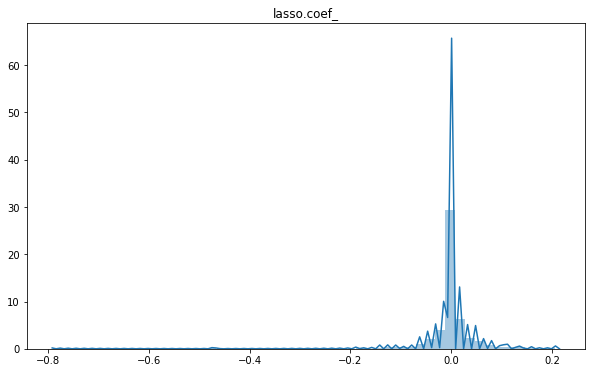

In [91]:
plt.figure(figsize=(10,6))

plt.title('lasso.coef_')
sns.distplot(lasso.coef_)

In [92]:
# If we double the socre of alpha
alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [93]:
lasso.coef_

array([ 4.26701705e-05,  7.35495110e-06,  0.00000000e+00,  0.00000000e+00,
       -2.31644073e-03, -1.28372880e-03,  1.15758870e-05,  1.63505817e-05,
       -1.00830915e-05, -3.77393639e-05,  1.85754260e-04,  2.06791532e-02,
       -1.48249231e-06,  9.83050533e-05,  0.00000000e+00,  2.33954313e-04,
       -1.54613628e-04,  1.43843876e-04,  1.03161575e-04,  1.11210568e-04,
        7.11618117e-05,  0.00000000e+00,  1.16291683e-04,  0.00000000e+00,
        0.00000000e+00,  2.92622363e-04,  9.83413929e-04, -2.40195353e-02,
       -0.00000000e+00,  0.00000000e+00, -1.43712935e-02, -5.45803187e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  5.03280916e-03, -9.76504556e-02, -0.00000000e+00,
       -1.00966459e-03,  5.03710533e-02,  4.15448773e-02,  3.20972402e-02,
       -0.00000000e+00, -0.00000000e+00,  2.06343510e-02, -3.14523582e-04,
        0.00000000e+00,  1.86009346e-03, -0.00000000e+00,  0.00000000e+00,
        7.75939196e-03,  

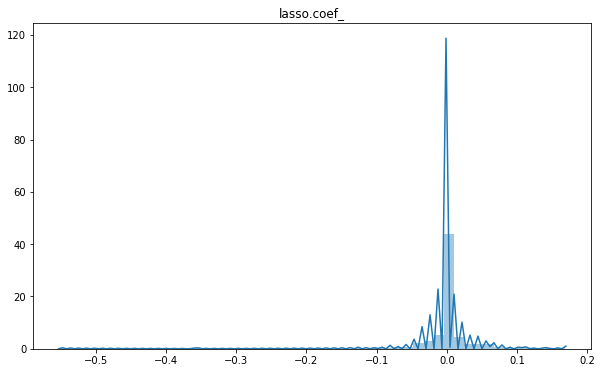

In [94]:
plt.figure(figsize=(10,6))

plt.title('lasso.coef_')
sns.distplot(lasso.coef_)

If we double the value of alpha the value of coeffienets got reduced and more features became zero 

In [95]:
#lets predict the R-squared value of train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.957964392785523


For double value of alpha score is also got reduced

In [96]:
# Again run the model on best value of alpha to predict the model
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_test, y_test) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [97]:
#lets predict the R-squared value of test data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9613586057015542


So the prediction score is also very good and almost same as train score 

In [98]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.004752310537125615


Here the RMSE is also very less, which is good 

Excersize for subjective Questions

In [99]:
# 
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [100]:
# Make a dataframe of col
col = X.columns
col1 = pd.DataFrame(col)

In [101]:
# Check the new created datafram
col1.head()

,0
0,LotFrontage
1,LotArea
2,Street
3,Utilities
4,YearBuilt


In [102]:
# Creat column name as features




col1= col1.rename(columns={ 0 : 'features'})

In [103]:
# Converting lasso.coef_ to a dataframe which is an array
lasso.coef_1 = pd.DataFrame(lasso.coef_)

In [104]:
# Concantinating two dataframe
pred_final = pd.concat([col1, lasso.coef_1],axis = 1)

In [105]:
# finding best predictor variables
pred_final.reset_index().sort_values(by=0,ascending=False).head(5)

,index,features,0
93,93,Condition2_PosA,0.205977
125,125,OverallCond_9,0.155507
221,221,BsmtFullBath_3,0.135284
116,116,OverallQual_9,0.134069
220,220,BsmtFullBath_2,0.111710


In [106]:
# finding best predictor variables
pred_final.reset_index().sort_values(by=0,ascending = True).head(5)

,index,features,0
293,293,PoolQC_Gd,-0.782919
94,94,Condition2_PosN,-0.470303
257,257,Functional_Sev,-0.184773
68,68,Neighborhood_MeadowV,-0.141973
118,118,OverallCond_2,-0.126222


## Theoritical Question excersize 

AS per Question 3 if we found that we are not having 5 most important predictor variable in our incoming data.  
we are dropping 5 most important predictor variable and perform again the lasso regression.

The most import predictor variables are 'PoolQC_Gd','Condition2_PosN','Condition2_PosA','Functional_Sev','OverallCond_9',   
Here some variables are in negative but still they are predictor for our model

In [107]:
X.head()

,LotFrontage,LotArea,Street,Utilities,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,1,1,16,16,196.0,706,0.0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600.0,1,1,43,43,0.0,978,0.0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250.0,1,1,18,17,162.0,486,0.0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550.0,1,1,104,49,0.0,216,0.0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260.0,1,1,19,19,350.0,655,0.0,490,...,0,0,0,0,1,0,0,0,1,0


In [108]:
X = X.drop(['PoolQC_Gd','Condition2_PosN','Condition2_PosA','Functional_Sev','OverallCond_9'],axis = 1)

In [109]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [110]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [111]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.345020,0.096693,0.0032,3.998995e-04,0.0001,{'alpha': 0.0001},-0.073357,-0.081051,-0.076740,-0.070716,...,-0.073677,0.004976,2,-0.052226,-0.049634,-0.050878,-0.052786,-0.053852,-0.051875,0.001475
1,0.110206,0.017703,0.0026,4.899209e-04,0.001,{'alpha': 0.001},-0.069233,-0.078704,-0.074232,-0.073615,...,-0.072751,0.003837,1,-0.066524,-0.064268,-0.064475,-0.065732,-0.066957,-0.065591,0.001073
2,0.060404,0.008285,0.0026,4.898624e-04,0.01,{'alpha': 0.01},-0.088793,-0.104192,-0.098092,-0.094007,...,-0.094922,0.005719,3,-0.094437,-0.091255,-0.092431,-0.092965,-0.094193,-0.093056,0.001170
3,0.052803,0.004535,0.0024,4.900376e-04,0.05,{'alpha': 0.05},-0.090666,-0.106141,-0.100296,-0.096554,...,-0.096747,0.006039,5,-0.097100,-0.092619,-0.094772,-0.095569,-0.097375,-0.095487,0.001727
4,0.037602,0.008261,0.0030,6.325605e-04,0.1,{'alpha': 0.1},-0.090537,-0.106098,-0.100252,-0.096617,...,-0.096694,0.006070,4,-0.097141,-0.092716,-0.094717,-0.095619,-0.097416,-0.095522,0.001717
5,0.040002,0.004472,0.0026,8.001089e-04,0.2,{'alpha': 0.2},-0.090414,-0.106303,-0.100576,-0.097619,...,-0.097075,0.006096,6,-0.097573,-0.093131,-0.094906,-0.096101,-0.097800,-0.095902,0.001738
6,0.037002,0.007484,0.0028,4.000426e-04,0.3,{'alpha': 0.3},-0.090822,-0.106771,-0.101228,-0.098604,...,-0.097739,0.006069,7,-0.098294,-0.093753,-0.095425,-0.096776,-0.098421,-0.096534,0.001771
7,0.033002,0.007376,0.0028,3.999949e-04,0.4,{'alpha': 0.4},-0.091678,-0.107652,-0.102025,-0.099722,...,-0.098584,0.006140,8,-0.099255,-0.094575,-0.096329,-0.097717,-0.099292,-0.097433,0.001802
8,0.030602,0.008500,0.0032,4.000664e-04,0.5,{'alpha': 0.5},-0.092656,-0.108768,-0.103133,-0.101065,...,-0.099647,0.006256,9,-0.100373,-0.095689,-0.097304,-0.098890,-0.100389,-0.098529,0.001820
9,0.025201,0.007387,0.0026,4.899403e-04,0.6,{'alpha': 0.6},-0.093922,-0.109506,-0.104103,-0.102546,...,-0.100753,0.006126,10,-0.101608,-0.096840,-0.098290,-0.100056,-0.101478,-0.099654,0.001848


In [112]:
#lets find out the R-squared value of the lasso model
model_cv2 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv2.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [113]:
# cv results
cv_results2 = pd.DataFrame(model_cv2.cv_results_)
cv_results2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.346620,0.100551,0.0028,3.998756e-04,0.0001,{'alpha': 0.0001},0.917515,0.880867,0.901797,0.921806,...,0.912442,0.019977,2,0.960600,0.964811,0.964065,0.960265,0.958564,0.961661,0.002382
1,0.106606,0.013981,0.0030,6.324097e-04,0.001,{'alpha': 0.001},0.932615,0.892394,0.904302,0.919390,...,0.917562,0.017340,1,0.932717,0.939040,0.937925,0.934311,0.930326,0.934864,0.003235
2,0.059404,0.003200,0.0034,4.898624e-04,0.01,{'alpha': 0.01},0.885302,0.817106,0.823005,0.863648,...,0.855528,0.030261,3,0.856803,0.869159,0.869983,0.862092,0.856541,0.862916,0.005790
3,0.051203,0.002315,0.0026,4.899403e-04,0.05,{'alpha': 0.05},0.878472,0.809068,0.815663,0.855550,...,0.848268,0.030799,4,0.847014,0.864259,0.862100,0.852422,0.845659,0.854291,0.007633
4,0.038802,0.009766,0.0030,6.324851e-04,0.1,{'alpha': 0.1},0.878103,0.808623,0.816228,0.854147,...,0.847912,0.030631,5,0.846562,0.863838,0.861718,0.851984,0.845238,0.853868,0.007648
5,0.039602,0.007256,0.0030,6.325605e-04,0.2,{'alpha': 0.2},0.875966,0.807312,0.816599,0.850170,...,0.846299,0.030108,6,0.844903,0.862481,0.860192,0.850383,0.843676,0.852327,0.007729
6,0.037802,0.006736,0.0034,8.000970e-04,0.3,{'alpha': 0.3},0.873304,0.806060,0.816090,0.847226,...,0.844506,0.029568,7,0.842729,0.860483,0.857670,0.848689,0.841391,0.850192,0.007710
7,0.034602,0.006975,0.0032,3.999710e-04,0.4,{'alpha': 0.4},0.870552,0.804587,0.814797,0.843637,...,0.842400,0.029270,8,0.840376,0.858159,0.854876,0.846386,0.839220,0.847804,0.007591
8,0.030202,0.007808,0.0034,4.898819e-04,0.5,{'alpha': 0.5},0.867175,0.802448,0.812352,0.839302,...,0.839544,0.029123,9,0.837398,0.855172,0.852151,0.843426,0.836448,0.844919,0.007589
9,0.025602,0.003774,0.0034,7.999420e-04,0.6,{'alpha': 0.6},0.863401,0.800536,0.810183,0.834706,...,0.836627,0.028783,10,0.834129,0.852333,0.849539,0.840336,0.833534,0.841974,0.007746


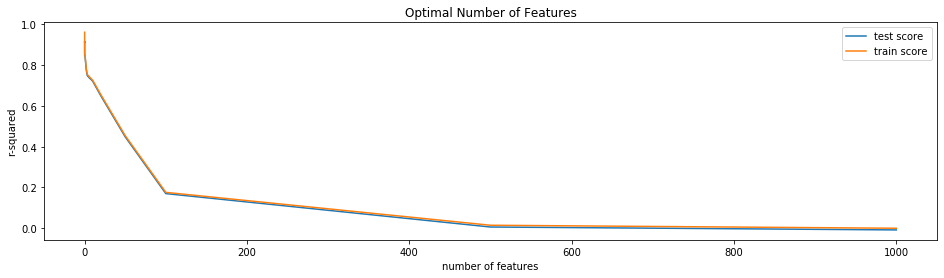

In [114]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results2["param_alpha"], cv_results2["mean_test_score"])
plt.plot(cv_results2["param_alpha"], cv_results2["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [115]:
#checking the value of optimum number of parameters
print(model_cv2.best_params_)
print(model_cv2.best_score_)

{'alpha': 0.001}
0.9175622637536577


In [116]:
# Let's check the model score on train on best value of alpha
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [117]:
lasso.coef_

array([-2.73043673e-05,  8.04013307e-06,  0.00000000e+00,  0.00000000e+00,
       -2.08478219e-03, -1.27158200e-03, -1.58967666e-05, -7.05200226e-06,
       -2.76553215e-05, -5.88323154e-05,  1.90030736e-04,  2.92425535e-02,
       -2.01499132e-05,  8.97925487e-05,  0.00000000e+00,  2.52867341e-04,
       -1.03718965e-04,  1.42004963e-04,  9.72555186e-05,  9.09869859e-05,
        4.12014999e-05,  0.00000000e+00,  1.22454416e-04,  0.00000000e+00,
        0.00000000e+00,  7.04954936e-04, -3.28226741e-05, -3.77772252e-02,
       -4.04595423e-02,  0.00000000e+00, -2.09159384e-02, -7.03906905e-02,
       -1.31451697e-04,  4.43108352e-02,  0.00000000e+00,  5.43204976e-03,
       -5.53446147e-03,  0.00000000e+00, -1.10941777e-01, -0.00000000e+00,
       -1.60690048e-02,  5.37496680e-02,  4.36806906e-02,  3.12400957e-02,
        0.00000000e+00,  0.00000000e+00,  1.70318325e-02, -5.67117994e-03,
       -0.00000000e+00,  4.23744749e-03,  1.02117617e-03,  0.00000000e+00,
        2.52639915e-02,  

In [118]:
# Converting lasso.coef_ to a dataframe which is an array
lasso.coef_1 = pd.DataFrame(lasso.coef_)

In [119]:
# Creat column name as features
col1= col1.rename(columns={ 0 : 'features'})

In [120]:
# Concantinating two dataframe
pred_final = pd.concat([col1, lasso.coef_1],axis = 1)

In [121]:
# finding best predictor variables
pred_final.reset_index().sort_values(by=0,ascending = True).head(5)

,index,features,0
116,116,OverallQual_9,-0.186183
117,117,OverallQual_10,-0.171700
118,118,OverallCond_2,-0.142968
68,68,Neighborhood_MeadowV,-0.135856
248,248,TotRmsAbvGrd_9,-0.129294


In [122]:
# finding best predictor variables
pred_final.reset_index().sort_values(by=0,ascending = False).head(5)

,index,features,0
114,114,OverallQual_7,0.160897
289,289,GarageCond_TA,0.123209
113,113,OverallQual_6,0.109139
64,64,Neighborhood_Crawfor,0.104840
233,233,BedroomAbvGr_5,0.102844
